# Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-dark')
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

# Exploratory Data Analysis

In [ ]:
train = pd.read_csv("/content/drive/My Drive/Machine_Hack/House Price Prediction Challenge/Train.csv")
test = pd.read_csv("/content/drive/My Drive/Machine_Hack/House Price Prediction Challenge/Test.csv")
ss = pd.read_csv("/content/drive/My Drive/Machine_Hack/House Price Prediction Challenge/sample_submission.csv")

In [ ]:
ss.head(10)

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


## 1.Brief look into data

In [ ]:
train.head(5)
test.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [ ]:
Target_col = 'TARGET(PRICE_IN_LACS)'

## 2.Dataset shape

In [ ]:
print(f'\n Train contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\n Test contains {test.shape[0]} samples and {test.shape[1]} variables')


 Train contains 29451 samples and 12 variables

 Test contains 68720 samples and 11 variables


## 3.Target Distribution

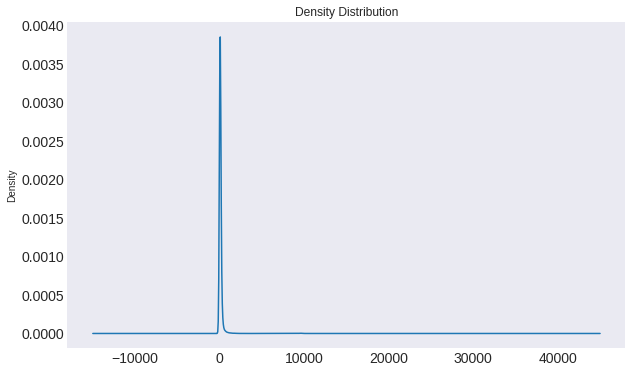

In [ ]:
train[Target_col].plot(kind='density', title="Density Distribution", fontsize=14, figsize=(10,6))

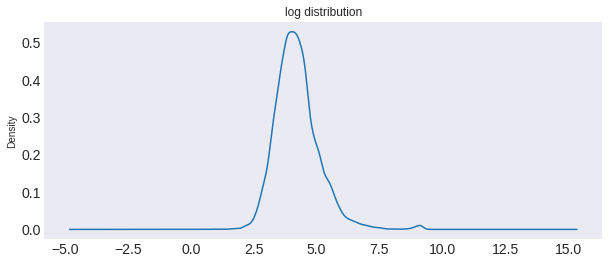

In [ ]:
pd.Series(np.log1p(train[Target_col])).plot(kind='density', title='log distribution', fontsize=14, figsize=(10,4))

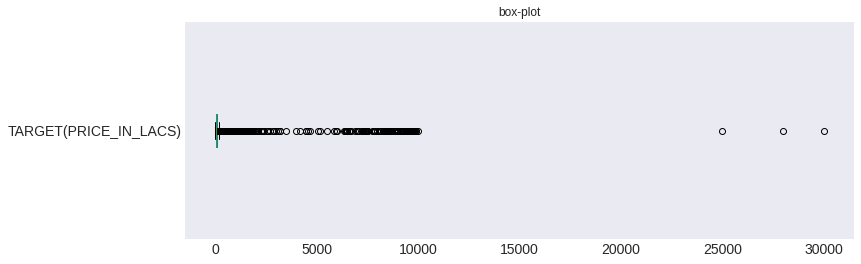

In [ ]:
train[Target_col].plot(kind='box', vert=False, fontsize=14, figsize=(12,4), title='box-plot')

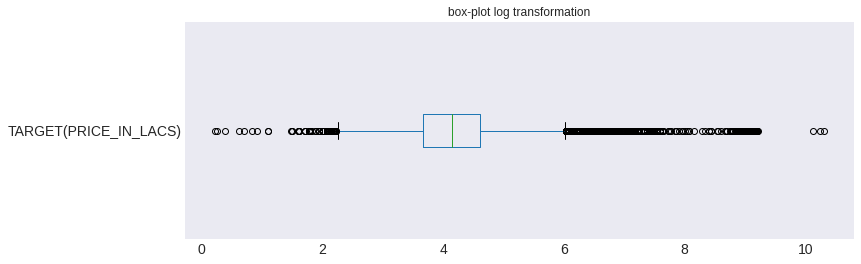

In [ ]:
pd.Series(np.log1p(train[Target_col])).plot(kind='box', title='box-plot log transformation', vert=False, fontsize=14, figsize=(12,4))

## 4.Variable Datatype

In [ ]:
train.head(1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.96991,77.59796,55.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


## 5.Null Value

In [ ]:
percent_null_val = 100*(train.isnull().sum()/train.shape[0]).round(3)
percent_null_val.sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    0.0
LATITUDE                 0.0
LONGITUDE                0.0
ADDRESS                  0.0
RESALE                   0.0
READY_TO_MOVE            0.0
SQUARE_FT                0.0
BHK_OR_RK                0.0
BHK_NO.                  0.0
RERA                     0.0
UNDER_CONSTRUCTION       0.0
POSTED_BY                0.0
dtype: float64

## 6.Unoque value in each column

In [ ]:
train.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

# Analyzing Each Variable & their relationships

In [ ]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

# Segregating Categorical & Numerical Variables

In [ ]:
cat_col = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 
           'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']

In [ ]:
num_col = [col for col in train.columns if col not in cat_col]
num_col

['SQUARE_FT', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

In [ ]:
num_col = [c for c in list(num_col) if c!='ADDRESS']
num_col

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

# Categorical Features

## Univariate Analysis - Pie Charts.

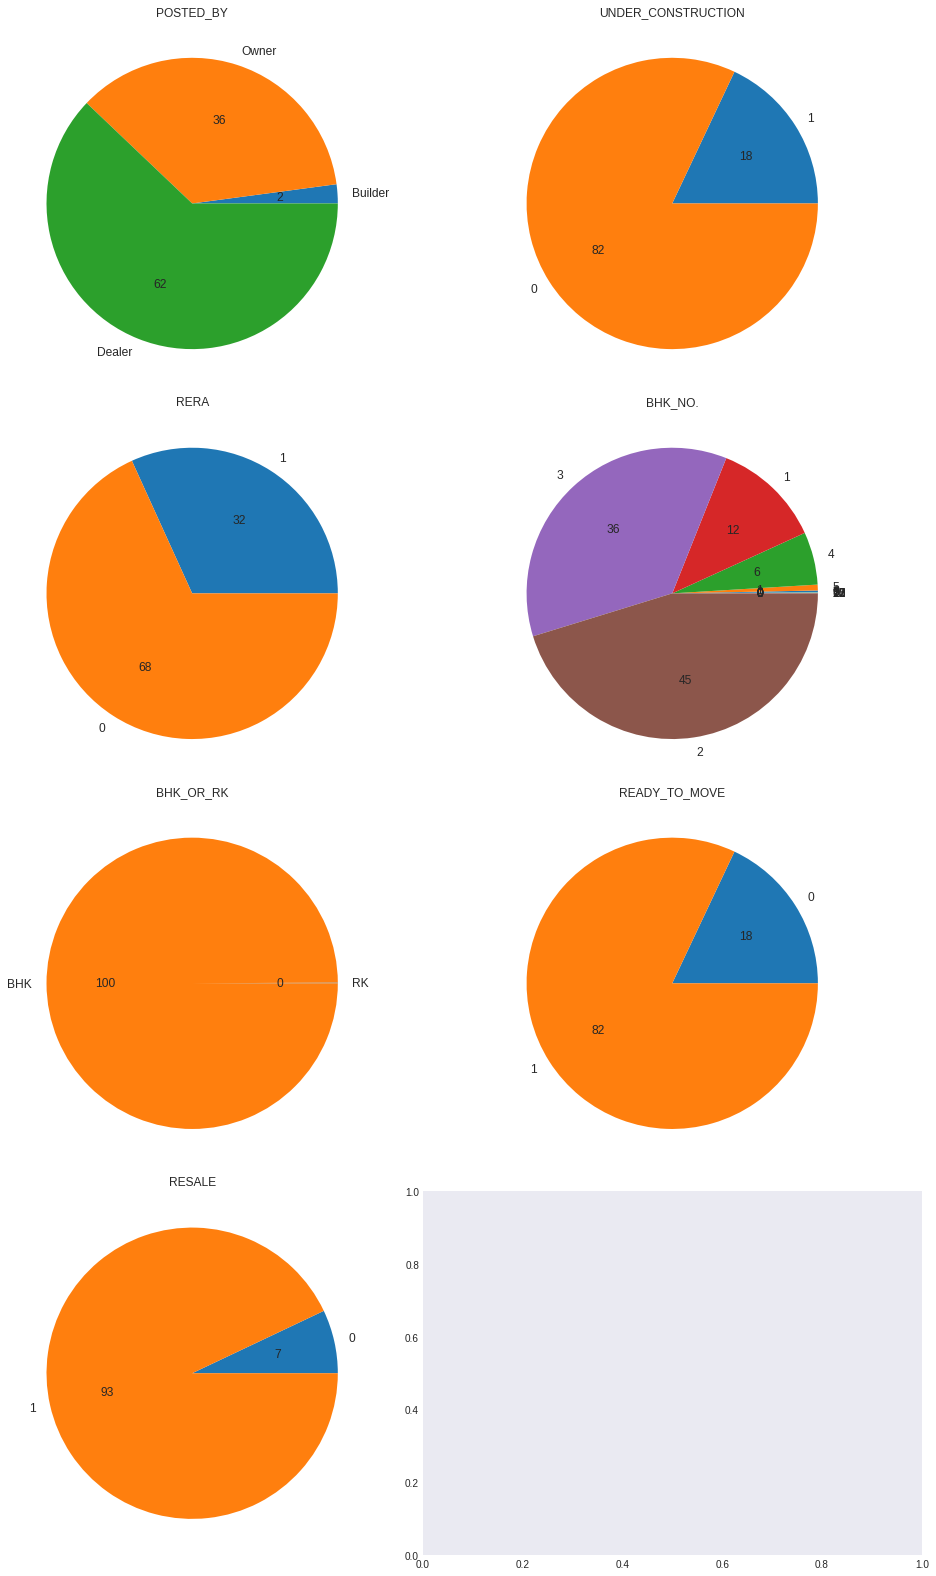

In [ ]:
fig, axis = plt.subplots(4,2, figsize=(14,22))
axes = [ax for axes_row in axis for ax in axes_row]

for i,c in enumerate(train[cat_col]):
  _ = train[c].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

## Univariate Analysis - CountPlots

In [ ]:
fig, axes = plt.subplots(4,2,figsize=(16,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(train[cat_col]):
  _ = train[c].value_counts()[::-1].plot(kind='barh', ax=axes[i], title=c, fontsize=12)

_ = plt.tight_layout()


### Multivariate Anlysis

#### Catplot

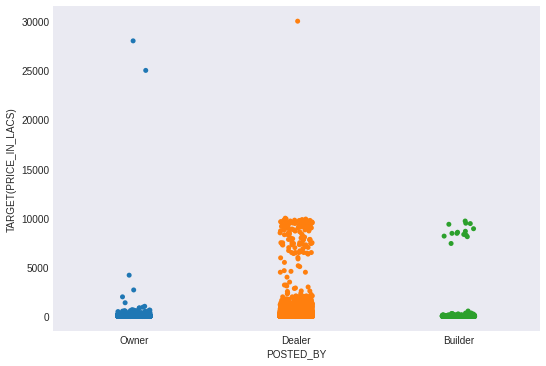

In [ ]:
sns.catplot(x='POSTED_BY', y=Target_col, data=train, height=5, aspect=24/16)

In [ ]:
['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 
           'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']

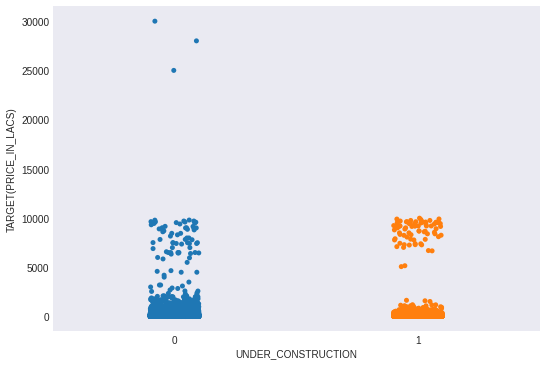

In [ ]:
sns.catplot(x='UNDER_CONSTRUCTION', y=Target_col, data=train, height=5, aspect=24/16)

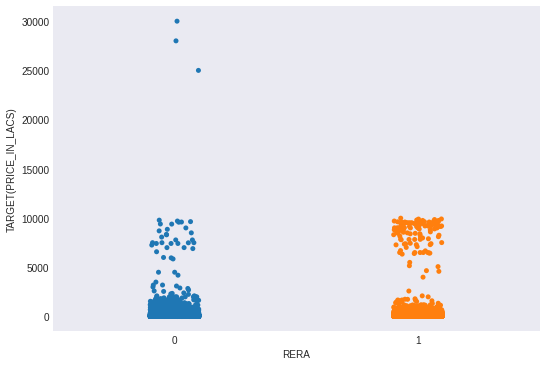

In [ ]:
sns.catplot(x='RERA', y=Target_col, data=train, height=5, aspect=24/16)

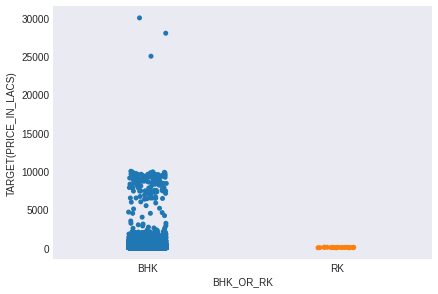

In [ ]:
sns.catplot(x='BHK_OR_RK', y=Target_col, data=train, height=4, aspect=24/16)

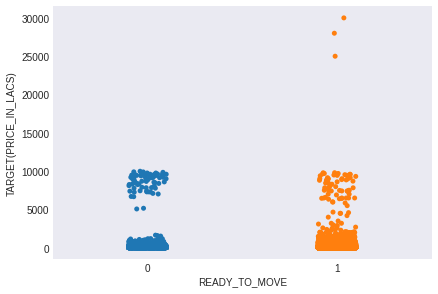

In [ ]:
sns.catplot(x='READY_TO_MOVE', y=Target_col, data=train, height=4, aspect=24/16)

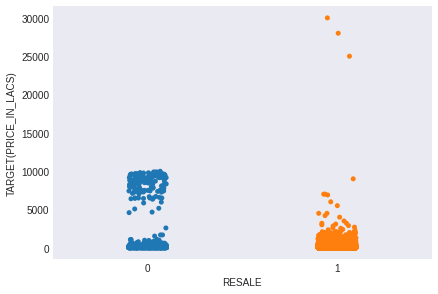

In [ ]:
sns.catplot(x='RESALE', y=Target_col, data=train, height=4, aspect=24/16)

## Numerical Features

## 1. Univariate Analysis - Boxplots

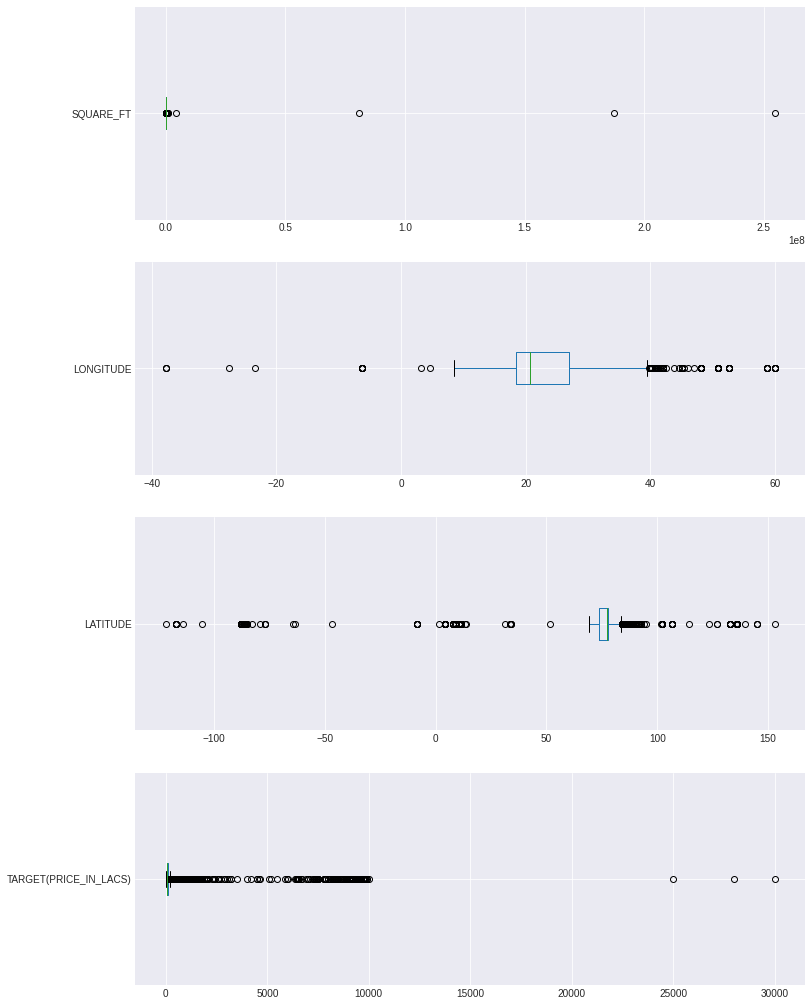

In [ ]:
fig, axes = plt.subplots(4,1,figsize=(12,18))

for i,c in enumerate(train[num_col]):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)



## 2. Univariate Analysis - Density Plots

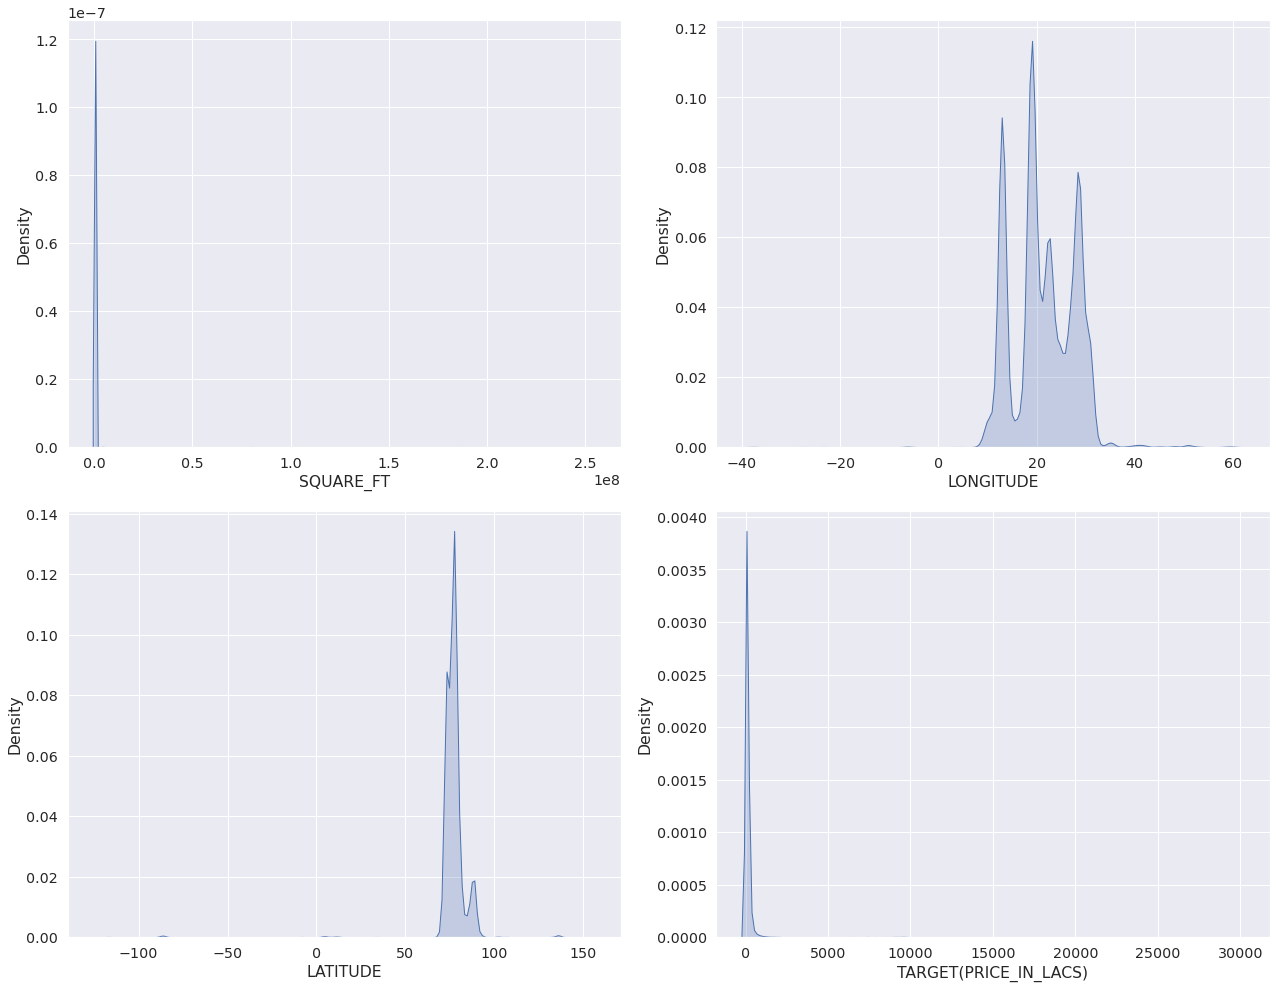

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2,2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_col):
  sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)

plt.tight_layout()

### After log

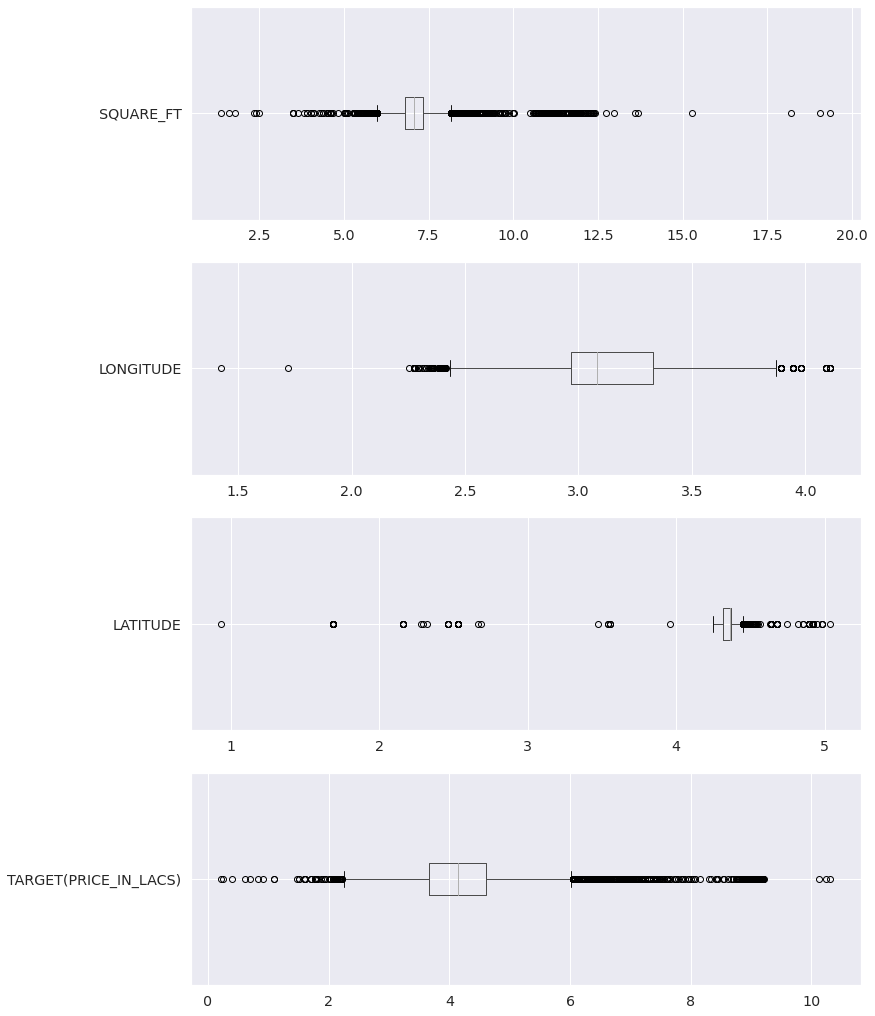

In [ ]:
fig, axes = plt.subplots(4,1,figsize=(12,18))

for i,c in enumerate(train[num_col]):
  _ = np.log1p(train[[c]]).boxplot(ax=axes[i], vert=False)


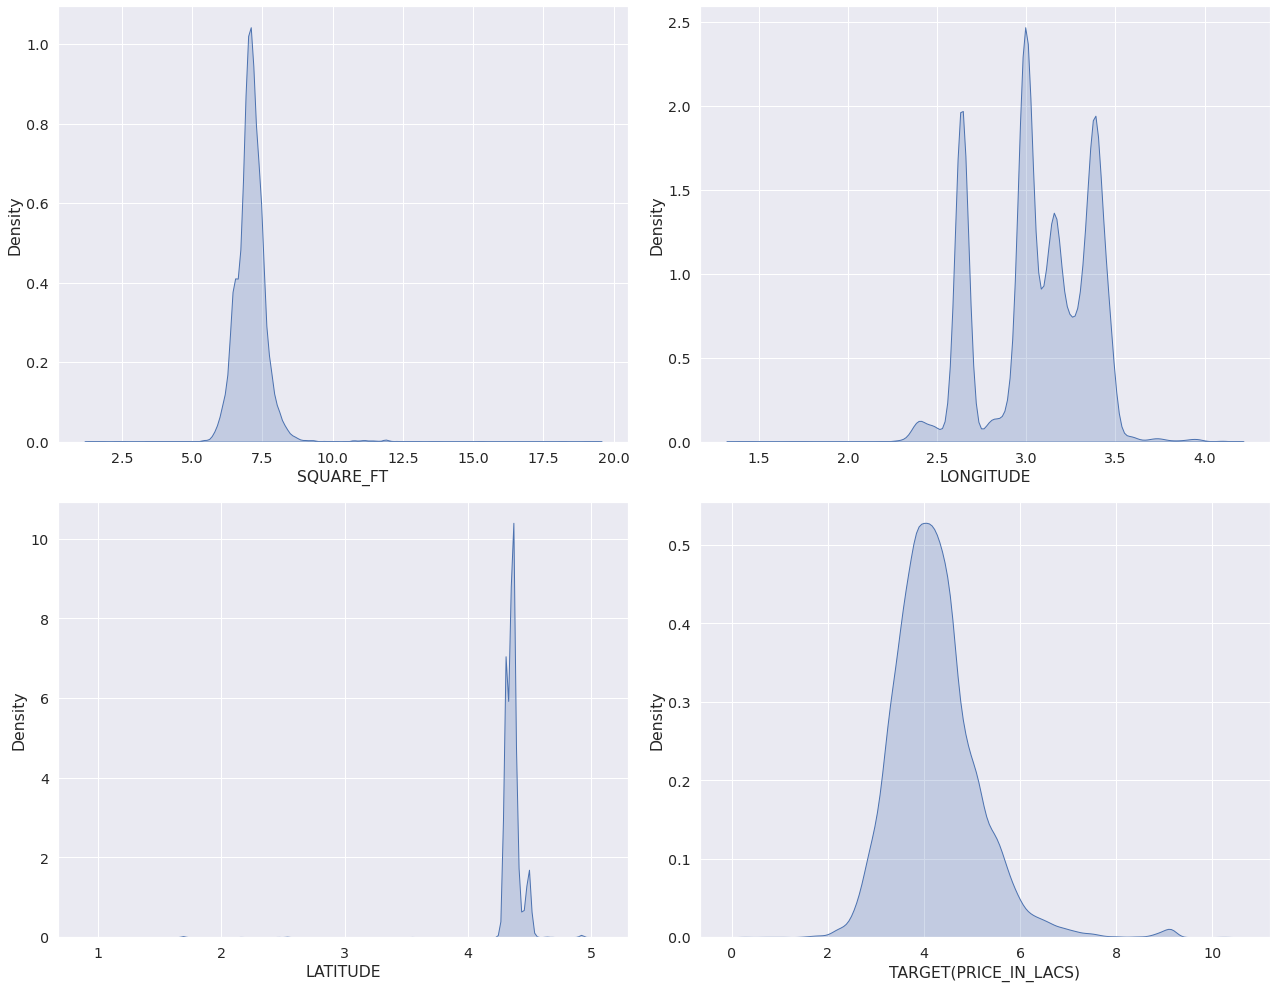

In [ ]:
log_data = pd.DataFrame()
for c in num_col:
  log_data[c] = np.log1p(train[c])

sns.set(font_scale=1.3)
fig, axes = plt.subplots(2,2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_col):
  sns.kdeplot(data=log_data, x=c, ax=axes[i], fill=True)

plt.tight_layout()

## Bivariate Analysis

### Correlation HeatMaps

<Figure size 1008x576 with 0 Axes>

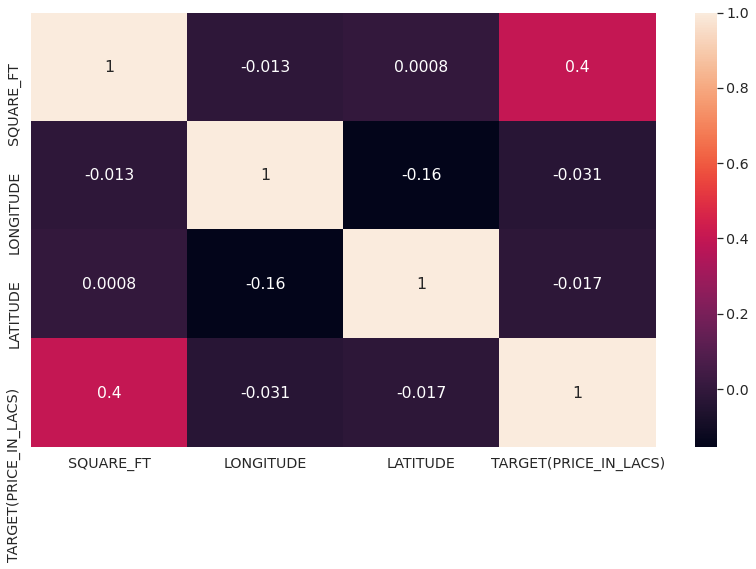

In [ ]:
plt.figure(figsize=(14,8))
_ = sns.heatmap(data=train[num_col].corr(), annot=True)

### Pair plot

In [ ]:
_ = sns.pairplot(train[num_col], height=5, aspect=24/16)

## Textual Data

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'ADDRESS')

(-0.5, 399.5, 199.5, -0.5)

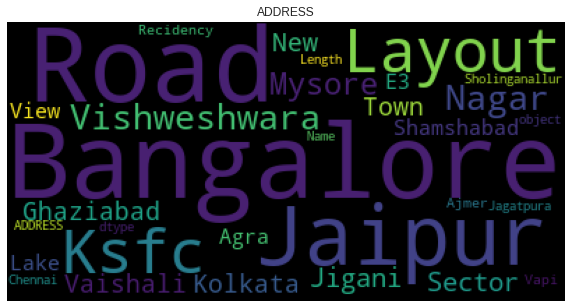

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state=42)
plt.figure(figsize=(10,6))
op = wc.generate(str(train['ADDRESS']))
plt.imshow(op)
plt.title("ADDRESS")
plt.axis('off')

In [ ]:
train[Target_col].describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [ ]:
add_len = train['ADDRESS'].apply(lambda x: len(x))
add_len

0        21
1        25
2        16
3        27
4        16
         ..
29446    20
29447    33
29448    17
29449    22
29450    16
Name: ADDRESS, Length: 29451, dtype: int64

In [ ]:
train[Target_col].corr(add_len)

0.0027753311266564018

# Baseline Model(s)

## Model A (mean)

In [ ]:
train[num_col] = train[num_col].apply(lambda x: np.log1p(x))
num_cols = [c for c in num_col if c!=Target_col]
test[num_cols] = test[num_cols].apply(lambda x: np.log1p(x))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_test, y_pred):
  return np.sqrt(mean_squared_log_error(y_test, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))
  
target = train[Target_col]

In [ ]:
pred_targ = pd.Series([target.mean()]*len(train))

av_metric_score = av_metric(target, pred_targ)

print(f'AV score is {av_metric_score}')

AV score is 162.4095877469111


In [ ]:
pred_test = pd.Series([target.mean()]*len(test))
preds_test = np.expm1(pred_test)

sol_f = pd.DataFrame()
sol_f[Target_col] = preds_test
sol_f.to_csv('sol.csv', index=False)

In [ ]:
sol_f.head()

,TARGET(PRICE_IN_LACS)
0,4.161016
1,4.161016
2,4.161016
3,4.161016
4,4.161016


## Model B (median)

In [ ]:
pred_targ = pd.Series([target.median()]*len(train))

av_metric_score = av_metric(target, pred_targ)

print(f'AV score is {av_metric_score}')

AV score is 162.44666844580695


In [ ]:
pred_test = pd.Series([target.median()]*len(test))
preds_test = np.expm1(pred_test)

sol_f = pd.DataFrame()
sol_f[Target_col] = preds_test
sol_f.to_csv('sol.csv', index=False)

In [ ]:
sol_f.head()

,TARGET(PRICE_IN_LACS)
0,4.143135
1,4.143135
2,4.143135
3,4.143135
4,4.143135


## Model C (SQUARE_FT)

In [ ]:
num_col

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

In [ ]:
target_per_squre = ((train[Target_col] + 1)/(train['SQUARE_FT'] + 1))
target_per_squre.mean()

0.8550579960249236

In [ ]:
pred_targ = train['SQUARE_FT']*0.855057

av_metric_score = av_metric(target, pred_targ)

print(f'AV score is {av_metric_score}')

AV score is 197.64836801695336


In [ ]:
pred_test = test['SQUARE_FT']*0.855057
preds_test = np.expm1(pred_test)

sol_f = pd.DataFrame()
sol_f[Target_col] = preds_test
sol_f.to_csv('sol.csv', index=False)

## Model D (LONGITUDE)

In [ ]:
target_per_squre = ((train[Target_col] + 1)/(train['LATITUDE'] + 1))
target_per_squre.mean()

0.9865323297068952

In [ ]:
pred_targ = train['LATITUDE']*0.986532

av_metric_score = av_metric(target, pred_targ)

print(f'AV score is {av_metric_score}')

In [ ]:
train['LATITUDE'].isnull().sum()

83